# 🚜Predicting the Sale Price of Bulldozers using Machine Learning
In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

Since we're trying to predict a number, this kind of problem is known as a **regression** problem.

The data and evaluation metric we'll be using (root mean square log error or RMSLE) is from the Kaggle Bluebook for Bulldozers competition.

The techniques used in here have been inspired and adapted from the fast.ai machine learning course.

# 1. Problem Definition
For this dataset, the problem we're trying to solve, or better, the question we're trying to answer is,

> How well can we predict the future sale price of a bulldozer, given its characteristics previous examples of how much similar bulldozers have been sold for?

# 2. Data
Looking at the dataset from Kaggle, you can you it's a time series problem. This means there's a time attribute to dataset.

In this case, it's historical sales data of bulldozers. Including things like, model type, size, sale date and more.

There are 3 datasets:
1. Train.csv - Historical bulldozer sales examples up to 2011 (close to 400,000 examples with 50+ different attributes, including SalePrice which is the target variable).
2. Valid.csv - Historical bulldozer sales examples from January 1 2012 to April 30 2012 (close to 12,000 examples with the same attributes as Train.csv).
3. Test.csv - Historical bulldozer sales examples from May 1 2012 to November 2012 (close to 12,000 examples but missing the SalePrice attribute, as this is what we'll be trying to predict).

# 3. Evaluation
For this problem, Kaggle has set the evaluation metric to being root mean squared log error (RMSLE). As with many regression evaluations, the goal will be to get this value as low as possible.

To see how well our model is doing, we'll calculate the RMSLE and then compare our results to others on the Kaggle leaderboard.

# 4. Features
Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a data dictionary.

For this dataset, Kaggle provide a data dictionary which contains information about what each attribute of the dataset means. You can download this file directly from the Kaggle competition page (account required) or view it on Google Sheets.

With all of this being known, let's get started!

First, we'll import the dataset and start exploring. Since we know the evaluation metric we're trying to minimise, our first goal will be building a baseline model and seeing how it stacks up against the competition.

## Importing the data and preparing it for modelling

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
plt.style.use('seaborn-dark')

In [2]:
tdf=pd.read_csv('TrainAndValid.csv',low_memory=False)
tdf.shape

(412698, 53)

In [3]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
tdf.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

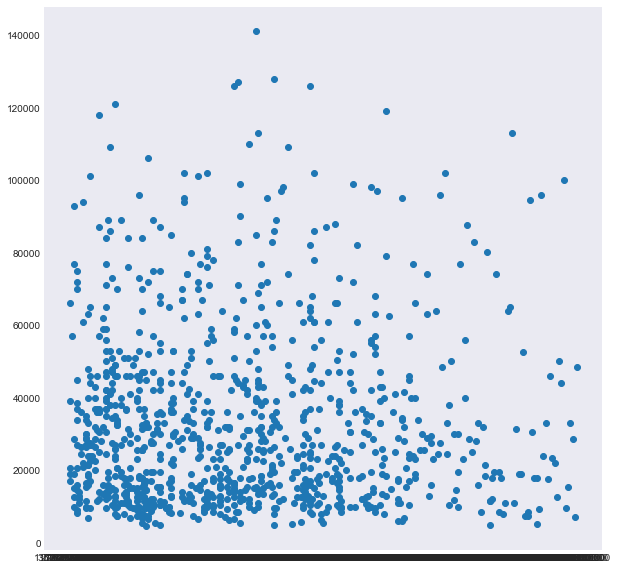

In [5]:
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(tdf.saledate[:1000],tdf.SalePrice[:1000])

In [6]:
tdf.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

<AxesSubplot:ylabel='Frequency'>

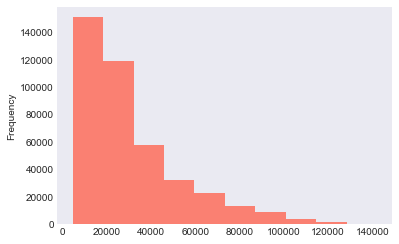

In [7]:
tdf.SalePrice.plot(kind='hist',color='salmon')

In [8]:
tdf.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,11/16/2006 0:00,3/26/2004 0:00,2/26/2004 0:00,5/19/2011 0:00,7/23/2009 0:00


## Parsing dates
When working with time series data, it's a good idea to make sure any date data is the format of a datetime object (a Python data type which encodes specific information about dates).

In [9]:
tdf=pd.read_csv('TrainAndValid.csv',parse_dates=['saledate'],low_memory=False)

In [10]:
tdf.saledate.dtype

dtype('<M8[ns]')

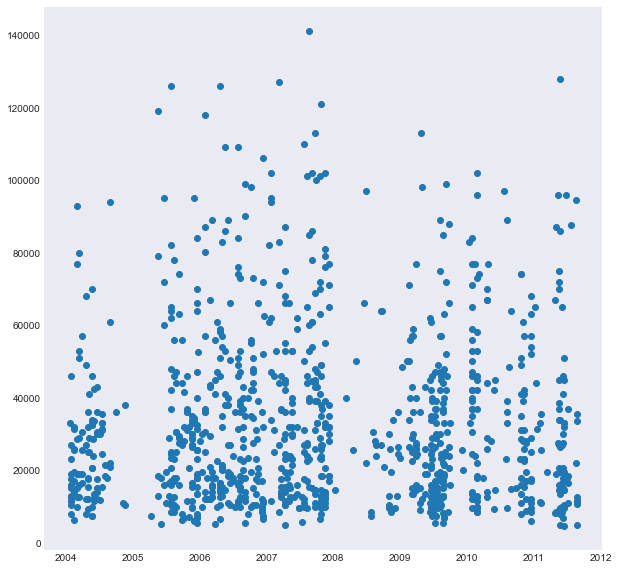

In [11]:
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(tdf.saledate[:1000],tdf.SalePrice[:1000])

We need to sort our data according to the saledate

In [12]:
tdf.sort_values(by=['saledate'],inplace=True,ascending=True)
tdf.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [13]:
df_tem = tdf.copy()
# copy of the original dataframe

### add date time attributes

In [14]:
df_tem['saleyear']=df_tem.saledate.dt.year

In [15]:
df_tem['saleMonth']=df_tem.saledate.dt.month

In [16]:
df_tem['saleDay']=df_tem.saledate.dt.day

In [17]:
df_tem['saleDayofWeek']=df_tem.saledate.dt.dayofweek

In [18]:
df_tem['saleDayofYear']=df_tem.saledate.dt.dayofyear

In [19]:
df_tem.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [20]:
df_tem.drop('saledate',axis=1,inplace=True)

In [21]:
df_tem.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

# 5. Modelling
We've explored our dataset a little as well as enriched it with some datetime attributes, now let's try to model.

Why model so early?

We know the evaluation metric we're heading towards. We could spend more time doing exploratory data analysis (EDA), finding more out about the data ourselves but what we'll do instead is use a machine learning model to help us do EDA.

Remember, one of the biggest goals of starting any new machine learning project is reducing the time between experiments.

Following the Scikit-Learn machine learning map, we find a RandomForestRegressor() might be a good candidate.

In [22]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1,random_state=42)
model.fit(df_tem.drop('SalePrice',axis=1),df_tem.SalePrice)

ValueError: could not convert string to float: 'Low'

so as we can see that we have data in string thus our model won't be able to make predictions on strings

In [23]:
df_tem.isna().sum()
# we have a lot of none available values

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [24]:
df_tem.info()
# we see we have a lot of string here

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

#### Convert strings to categories
One way to help turn all of our data into numbers is to convert the columns with the string datatype into a category datatype.

To do this we can use the pandas types API which allows us to interact and manipulate the types of data.

In [25]:
df_tem.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [26]:
pd.api.types.is_string_dtype(df_tem['Transmission'])

True

In [27]:
stringcol=[]
for label, content in df_tem.items():
    if(pd.api.types.is_string_dtype(content)):
        print(label)
        stringcol.append(label)
    

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [28]:
for x in stringcol:
    df_tem[x]=df_tem[x].astype("category").cat.as_ordered()

In [29]:
df_tem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [30]:
df_tem.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [31]:
df_tem.isnull().sum()/len(df_tem)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

## Save the Processed DataFrame

In [32]:
df_tem.to_csv('train_temp.csv',index=False)

In [33]:
df_tem=pd.read_csv('train_temp.csv',low_memory=False)

In [34]:
df_tem.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


## Fill missing values
From our experience with machine learning models. We know two things:

1. All of our data has to be numerical
2. There can't be any missing values
And as we've seen using df_tmp.isna().sum() our data still has plenty of missing values.

Let's fill them.

## Filling numerical values first
We're going to fill any column with missing values with the median of that column.

In [35]:
intL=[]
for label, content in df_tem.items():
    if (pd.api.types.is_numeric_dtype(content)):
        print(label)
        intL.append(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleyear
saleMonth
saleDay
saleDayofWeek
saleDayofYear


In [36]:
for x in intL:
    if(pd.api.types.is_numeric_dtype(df_tem[x])):
        if df_tem[x].isnull().sum():
            print(x)

auctioneerID
MachineHoursCurrentMeter


In [37]:
for x in intL: 
    if pd.api.types.is_numeric_dtype(df_tem[x]):
        if df_tem[x].isnull().sum():
            df_tem[x+'_is_missing']=df_tem[x].isnull()
            df_tem[x]=df_tem[x].fillna(df_tem[x].median())

Why add a binary column indicating whether the data was missing or not?

We can easily fill all of the missing numeric values in our dataset with the median. However, a numeric value may be missing for a reason. In other words, absence of evidence may be evidence of absence. Adding a binary column which indicates whether the value was missing or not helps to retain this information.

In [38]:
for label, content in df_tem.items():
    if (pd.api.types.is_numeric_dtype(content)):
        if pd.isnull(content).sum():
            print(label)

In [39]:
df_tem.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

### Filling and turning categorical variables to numbers
Now we've filled the numeric values, we'll do the same with the categorical values at the same time as turning them into numbers.

In [40]:
for label, content in df_tem.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [41]:
for label,content in df_tem.items():
    if not pd.api.types.is_numeric_dtype(content):
        # for Missing values
        df_tem[label+'_is_missing']=pd.isnull(content)
        # this actually assign the numerical value to the categories
        # we added one because code assigns -1 to the missing values we don't want that to happen thus we add +1
        df_tem[label]=pd.Categorical(df_tem[label]).codes+1

In [42]:
df_tem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [43]:
df_tem.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [44]:
df_tem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [45]:
len(df_tem)

412698

#### Spliting our Data

In [46]:
df_val=df_tem[df_tem.saleyear ==2012]
df_train=df_tem[df_tem.saleyear !=2012]

In [47]:
len(df_train),len(df_val)

(401125, 11573)

In [48]:
x_train=df_train.drop('SalePrice',axis=1)
y_train=df_train.SalePrice

In [49]:
x_valid=df_val.drop('SalePrice',axis=1)
y_valid=df_val.SalePrice

#### Running Machine learning model (RandomForestRegressor)

In [50]:
%%time
model=RandomForestRegressor(n_jobs=-1,random_state=12)
# instantiate model
model.fit(df_train.drop(['SalePrice'],axis=1),df_train['SalePrice'])

CPU times: total: 20min 38s
Wall time: 1min 29s


RandomForestRegressor(n_jobs=-1, random_state=12)

In [51]:
model.score(df_val.drop(['SalePrice'],axis=1),df_val['SalePrice'])

0.8722171687680382

#### Building an evaluation function
According to Kaggle for the Bluebook for Bulldozers competition, the evaluation function they use is root mean squared log error (RMSLE).

**RMSLE** = generally you don't care as much if you're off by $10 as much as you'd care if you were off by 10%, you care more about ratios rather than differences. MAE (mean absolute error) is more about exact differences.

It's important to understand the evaluation metric you're going for.

Since Scikit-Learn doesn't have a function built-in for RMSLE, we'll create our own.

We can do this by taking the square root of Scikit-Learn's mean_squared_log_error (MSLE). MSLE is the same as taking the log of mean squared error (MSE).

We'll also calculate the MAE and R^2 for fun.



In [52]:
from sklearn.metrics import mean_squared_log_error,mean_absolute_error
def rmsle(y_test,y_preds):
    """calculate root mean squared log error b/w predictions and true values"""
    return np.sqrt(mean_squared_log_error(y_test, y_preds))
# create function to evaluate model on different levels
def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(x_train, y_train),
              "Valid R^2": model.score(x_valid, y_valid)}
    return scores

In [53]:
show_scores(model)

{'Training MAE': 1578.781712932378,
 'Valid MAE': 6123.850955672687,
 'Training RMSLE': 0.084142557648654,
 'Valid RMSLE': 0.2553221971456309,
 'Training R^2': 0.9875230827956156,
 'Valid R^2': 0.8722171687680382}

### Testing our model on a subset (to tune the hyperparameters)
Retraing an entire model would take far too long to continuing experimenting as fast as we want to.

So what we'll do is take a sample of the training set and tune the hyperparameters on that before training a larger model.

If you're experiments are taking longer than 10-seconds (give or take how long you have to wait), you should be trying to speed things up. You can speed things up by sampling less data or using a faster computer.

**we can use `max_samples=` parameter to tell the computer that how many samples you want to estimate**  
> this will eventually slice the DataFrame

In [54]:
model2=RandomForestRegressor(n_jobs=-1,max_samples=10000,random_state=12)

In [55]:
%%time
model2.fit(x_train,y_train)

CPU times: total: 41.2 s
Wall time: 3.22 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=12)

In [56]:
show_scores(model)

{'Training MAE': 1578.781712932378,
 'Valid MAE': 6123.850955672687,
 'Training RMSLE': 0.084142557648654,
 'Valid RMSLE': 0.2553221971456309,
 'Training R^2': 0.9875230827956156,
 'Valid R^2': 0.8722171687680382}

In [57]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 12,
 'verbose': 0,
 'warm_start': False}

In [58]:
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000,100000]}

In [59]:
from sklearn.model_selection import RandomizedSearchCV


#### Randomized Search CV 


In [60]:
%%time
rs=RandomizedSearchCV(estimator=model,param_distributions=rf_grid,n_jobs=-1,n_iter=20,cv=5,verbose=True)
rs.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 1min 52s
Wall time: 2min 4s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=12),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000, 100000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [61]:
rs.best_params_

{'n_estimators': 60,
 'min_samples_split': 10,
 'min_samples_leaf': 7,
 'max_samples': 100000,
 'max_features': 0.5,
 'max_depth': None}

In [62]:
model3 = RandomForestRegressor(n_estimators=10,min_samples_split=6,
                               min_samples_leaf=7,max_samples=None,max_features=0.5,max_depth=None,n_jobs=-1)

In [63]:
%%time
model3.fit(x_train,y_train)

CPU times: total: 47.1 s
Wall time: 5.13 s


RandomForestRegressor(max_features=0.5, min_samples_leaf=7, min_samples_split=6,
                      n_estimators=10, n_jobs=-1)

In [64]:
show_scores(model3)

{'Training MAE': 3639.921650544797,
 'Valid MAE': 6117.2438665055,
 'Training RMSLE': 0.17612590241933712,
 'Valid RMSLE': 0.25166541766942935,
 'Training R^2': 0.9360079300159789,
 'Valid R^2': 0.8735062363046187}

In [65]:
tedf=pd.read_csv('Test.csv',parse_dates=['saledate'],low_memory=False)
tedf.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [66]:
tedf.sort_values(by=['saledate'],ascending=True,inplace=True)

In [67]:
for label,content in tedf.items():
    if pd.api.types.is_string_dtype(content):
        tedf[label]=tedf[label].astype('category').cat.as_ordered()

In [68]:
tedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12457 entries, 1408 to 9803
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   category      
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  category      
 10  fiBaseModel               12457 non-null  category      
 11  fiSecondaryDesc           8482 non-null   category      
 12  fiModelSeries   

In [69]:
tedf["saleyear"] = tedf.saledate.dt.year
tedf["saleMonth"] = tedf.saledate.dt.month
tedf["saleDay"] = tedf.saledate.dt.day
tedf["saleDayofWeek"] = tedf.saledate.dt.dayofweek
tedf["saleDayofYear"] = tedf.saledate.dt.dayofyear

In [70]:
for label,content in tedf.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            tedf[label+'_is_missing']=pd.isnull(content)
            tedf[label]=tedf[label].fillna(tedf[label].median())

In [71]:
for label,content in tedf.items():
    if not pd.api.types.is_numeric_dtype(content):
        tedf[label+'_is_missing']=pd.isnull(content)
        tedf[label]=pd.Categorical(content).codes + 1

In [72]:
tedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12457 entries, 1408 to 9803
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(1), int16(3), int64(11), int8(42)
memory usage: 2.4 MB


In [73]:
tedf.drop(['saledate','saledate_is_missing'],axis=1,inplace=True)

In [74]:
set(df_tem.columns)-set(tedf.columns)

{'SalePrice', 'auctioneerID_is_missing'}

In [75]:
tedf['auctioneerID_is_missing']=False

In [76]:
y_preds=model3.predict(tedf)

C:\Users\jains\JUPYTER\MilestoneClassifier\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


#### Feature Importance
Since we've built a model which is able to make predictions. The people you share these predictions with (or yourself) might be curious of what parts of the data led to these predictions.

This is where __feature importance__ comes in. Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the __target variable__.

In our case, after our model learned the patterns in the data, which bulldozer sale attributes were most important for predicting its overall sale price?

Beware: the default feature importances for random forests can lead to non-ideal results.

To find which features were most important of a machine learning model, a good idea is to search something like "[MODEL NAME] feature importance".

Doing this for our RandomForestRegressor leads us to find the feature_importances_ attribute.

Let's check it out.

In [77]:
model3.feature_importances_

array([3.19879984e-02, 1.71941328e-02, 4.62132717e-02, 1.53201376e-03,
       2.46018703e-03, 2.01455316e-01, 2.52366564e-03, 8.40029838e-04,
       3.88293523e-02, 4.14055663e-02, 6.03335365e-02, 3.94140460e-03,
       9.78292053e-03, 1.29997975e-01, 3.93027873e-02, 4.55546387e-03,
       1.40388190e-03, 7.64583771e-03, 5.43182474e-03, 1.07512581e-01,
       6.07673869e-04, 5.19589638e-05, 6.67106925e-04, 1.45647714e-04,
       1.09877073e-03, 8.87031405e-06, 7.99313376e-03, 8.35488942e-03,
       9.79075761e-05, 2.89675045e-03, 8.83934737e-04, 4.37955834e-04,
       2.83950036e-03, 4.40673440e-03, 1.42757592e-04, 3.71274565e-03,
       4.64847547e-04, 1.06971080e-02, 2.08638769e-04, 6.27367701e-03,
       1.22179262e-03, 6.42182920e-04, 7.76118153e-04, 4.39999286e-04,
       3.40917739e-04, 2.22355267e-04, 3.54291093e-04, 1.48201742e-03,
       1.13296793e-03, 2.56275917e-04, 8.77229700e-05, 7.46869656e-02,
       3.23393125e-03, 4.29534974e-03, 2.07156081e-03, 8.26035785e-03,
      

In [78]:
def plot_features(columns, in)

SyntaxError: invalid syntax (1268966394.py, line 1)